## Visualization of Spatially Continuous Reconstructions

## Loading Packages

In [32]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

import sys
sys.path.append("../../../")
from Model.preprocess import preprocessing

## Loading Data

In [ ]:
# name of slice
slices = ['ATAC', 'H3K4me3', 'H3K27ac', 'H3K27me3']

# Create a dictionary to store data for each slice
adata_dict = {}

for slice_name in slices:
    # file path
    rna_file_path = f"../../../Data/Mouse_Brain_{slice_name}/adata_RNA.h5ad"
    peaks_file_path = f"../../../Data/Mouse_Brain_{slice_name}/adata_peaks_normalized.h5ad"
    
    adata_modality_1 = sc.read_h5ad(rna_file_path)
    adata_modality_2 = sc.read_h5ad(peaks_file_path)
    
    # preprocessing
    print(f"Processing {slice_name} now!")
    adata_modality_1, adata_modality_2 = preprocessing(adata_modality_1, adata_modality_2, 'Spatial-epigenome-transcriptome')
    
    # storing
    adata_dict[slice_name] = {
        'adata_RNA': adata_modality_1,
        'adata_peaks_normalized': adata_modality_2
    }

Processing ATAC now!
Spatial-epigenome-transcriptome data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (9196, 3000)
Dimensions after preprocessing adata_modal_2: (9196, 121068)
Processing H3K4me3 now!
Spatial-epigenome-transcriptome data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (9513, 3000)
Dimensions after preprocessing adata_modal_2: (9513, 35270)
Processing H3K27ac now!
Spatial-epigenome-transcriptome data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (9323, 3000)
Dimensions after preprocessing adata_modal_2: (9323, 104162)
Processing H3K27me3 now!
Spatial-epigenome-transcriptome data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (9732, 3000)
Dimensions after preprocessing adata_modal_2: (9732, 70470)


## Calculating Smoothness

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a dictionary to store the results for each slice
results_dict = {}

# Define the function to calculate gradients
def calculate_gradients(adata_modality_1):
    # Extract data
    X1 = adata_modality_1.X
    X1 = np.sum(X1, axis=1)

    X2 = adata_modality_1.uns['INR']
    X2 = np.sum(X2, axis=1)

    coords = adata_modality_1.obsm['spatial']

    # Create DataFrame
    data_df = pd.DataFrame({
        'x': coords[:, 0],
        'X1': X1,
        'X2': X2
    })

    # Group by 'x' and sum
    sum_by_x = data_df.groupby('x')[['X1', 'X2']].sum().reset_index()

    # Normalize
    scaler = MinMaxScaler()
    sum_by_x[['X1', 'X2']] = scaler.fit_transform(sum_by_x[['X1', 'X2']])

    # Calculate gradients
    gradient_X1 = np.gradient(sum_by_x['X1'])
    gradient_X2 = np.gradient(sum_by_x['X2'])

    # Calculate absolute gradient values
    abs_gradient_X1 = np.abs(gradient_X1).sum()
    abs_gradient_X2 = np.abs(gradient_X2).sum()

    return sum_by_x, abs_gradient_X1, abs_gradient_X2

# Loop through each slice's data and calculate gradients
for slice_name, data in adata_dict.items():
    adata_modality_1 = data['adata_RNA']  # Assuming we use adata_RNA for calculations
    
    # Calculate gradients
    sum_by_x, abs_gradient_X1, abs_gradient_X2 = calculate_gradients(adata_modality_1)
    
    # Print gradient information for the current slice
    print(f"Slice: {slice_name}")
    print(f"Absolute Gradient X1: {abs_gradient_X1}")
    print(f"Absolute Gradient X2: {abs_gradient_X2}")
    print()

    # Store the results in the dictionary
    results_dict[slice_name] = {
        'sum_by_x': sum_by_x,
        'abs_gradient_X1': abs_gradient_X1,
        'abs_gradient_X2': abs_gradient_X2
    }

Slice: ATAC
Absolute Gradient X1: 4.915472984313965
Absolute Gradient X2: 3.349282741546631

Slice: H3K4me3
Absolute Gradient X1: 6.224664211273193
Absolute Gradient X2: 3.8888275623321533

Slice: H3K27ac
Absolute Gradient X1: 4.102195739746094
Absolute Gradient X2: 3.959198474884033

Slice: H3K27me3
Absolute Gradient X1: 6.374758243560791
Absolute Gradient X2: 4.204938888549805



## Ploting

Plot the ATAC slice.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


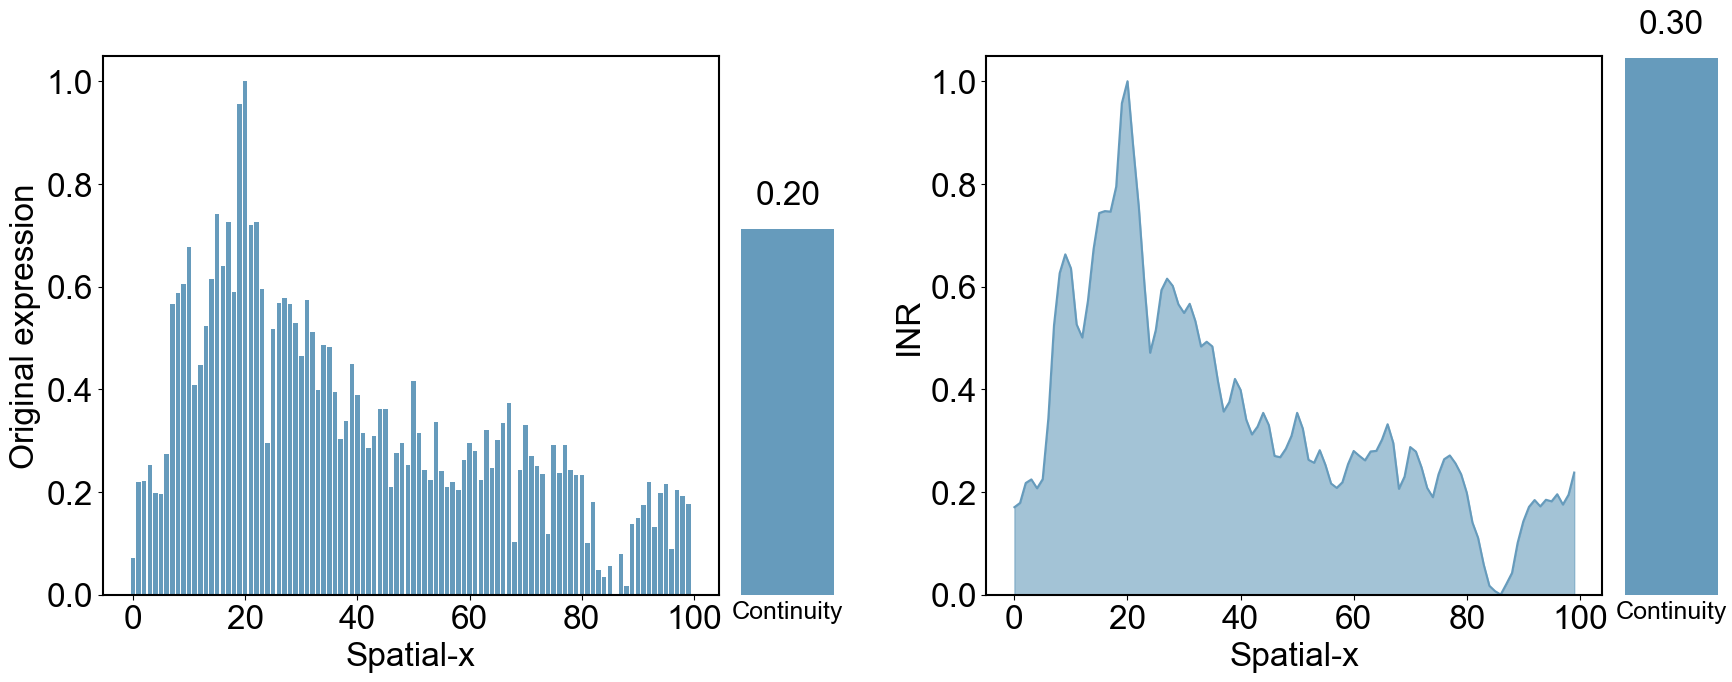

Plot the H3K4me3 slice.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


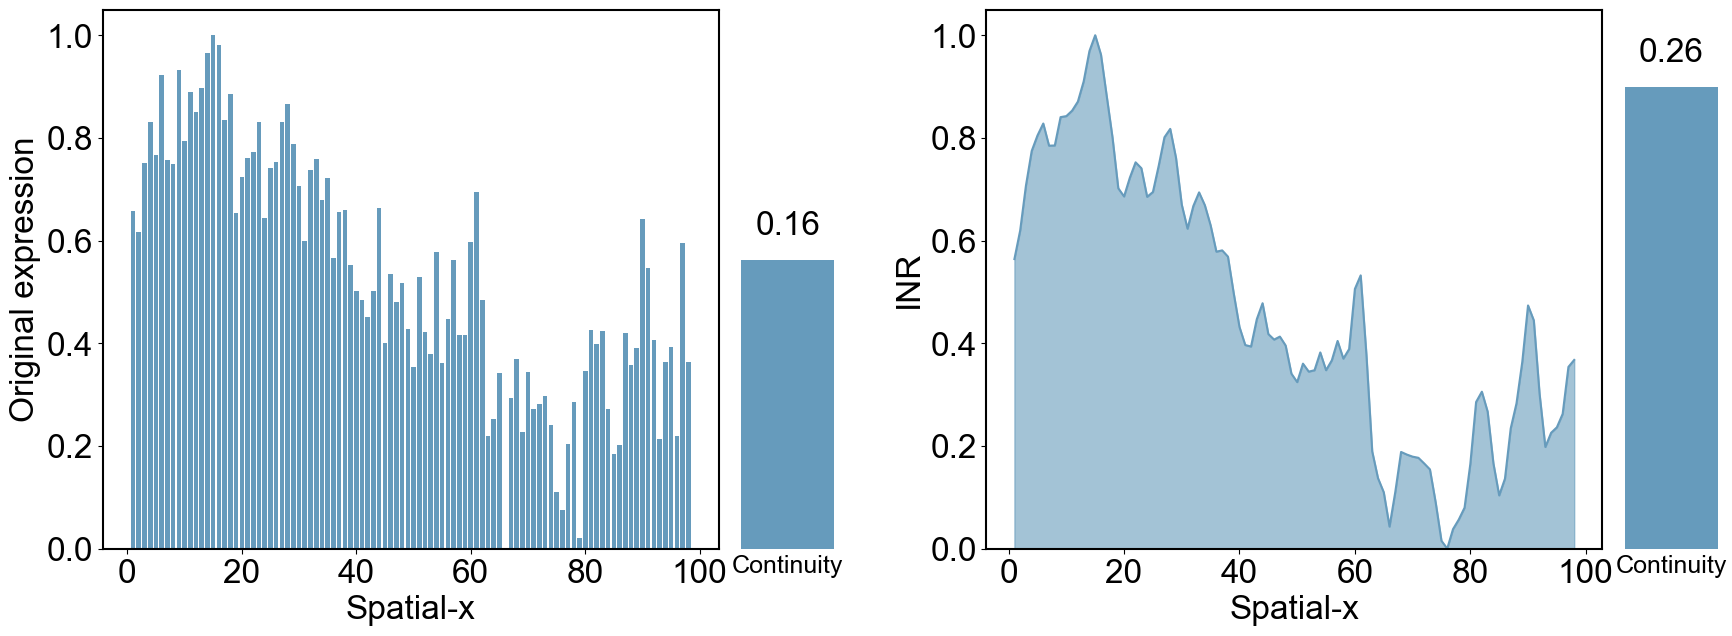

Plot the H3K27ac slice.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


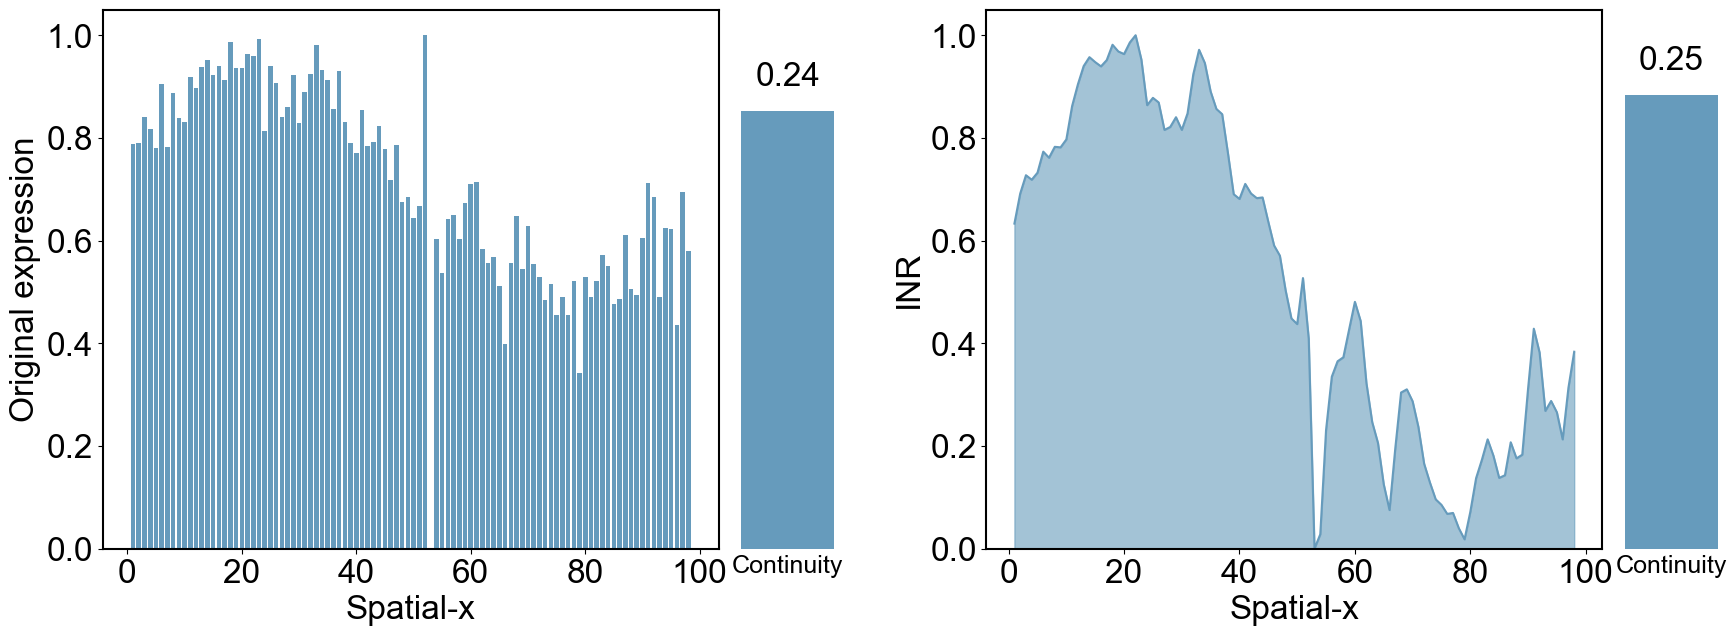

Plot the H3K27me3 slice.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


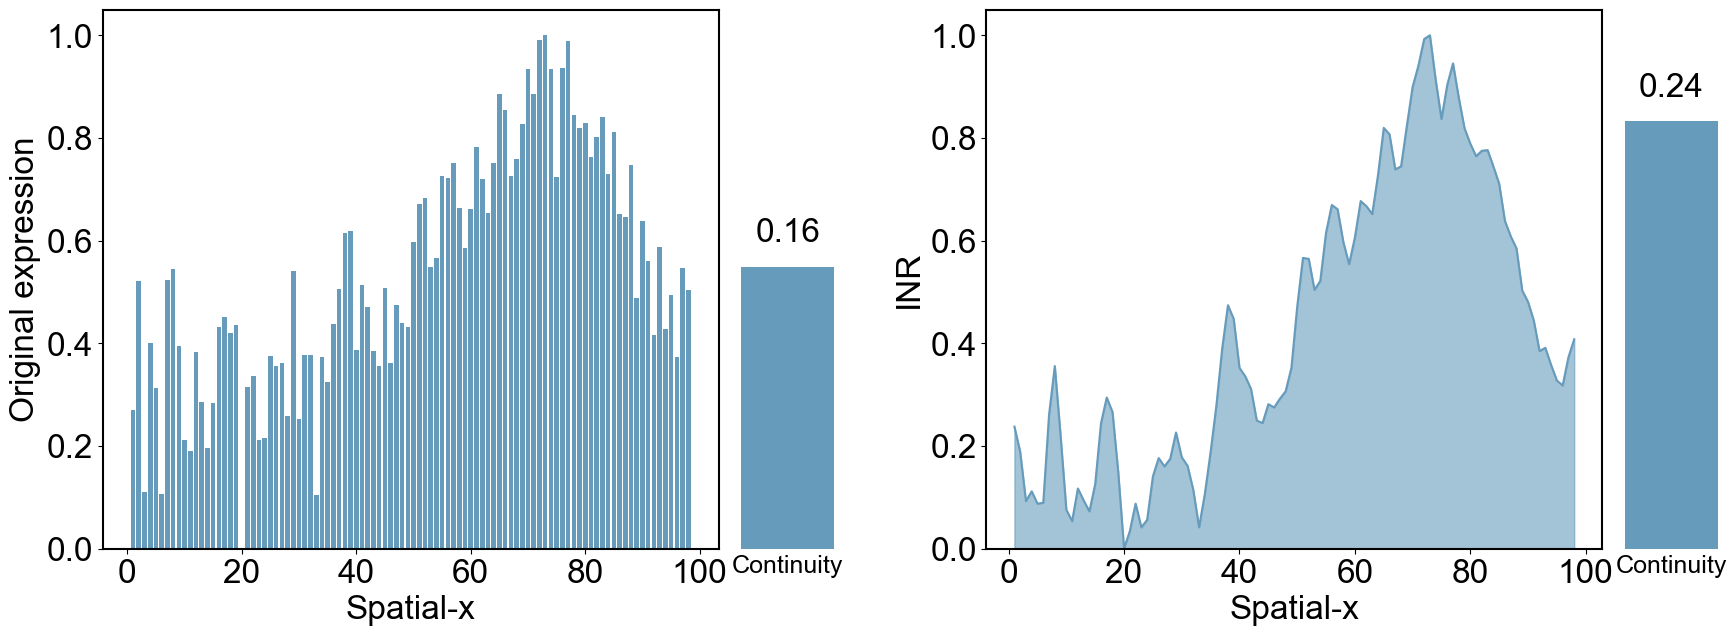

In [60]:
for slice_name, results in results_dict.items():
    print(f"Plot the {slice_name} slice.")
    sum_by_x = results['sum_by_x']
    abs_gradient_X1 = results['abs_gradient_X1']
    abs_gradient_X2 = results['abs_gradient_X2']

    # Create a figure
    fig = plt.figure(figsize=(18, 7))

    # Create an outer GridSpec to define the overall layout of the figure
    outer_gs = GridSpec(1, 2, width_ratios=[9, 9], wspace=0.2)

    # Create the first inner GridSpec, containing the first and second subplots
    inner_gs1 = GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[0], width_ratios=[6, 1], wspace=0.05)

    # Create the second inner GridSpec, containing the third and fourth subplots
    inner_gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[1], width_ratios=[6, 1], wspace=0.05)

    color = '#669bbc'

    # Set the global font to Arial and the global font size
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 24

    # Plot the first subplot: Bar chart of X1
    ax1 = fig.add_subplot(inner_gs1[0])
    ax1.bar(sum_by_x['x'], sum_by_x['X1'], color=color)
    ax1.set_xlabel('Spatial-x')
    ax1.set_ylabel('Original expression')
    ax1.set_ylim(0, 1.05)  # Set the y-axis range
    for spine in ax1.spines.values():
        spine.set_linewidth(1.5)  # Thicken the border

    # Plot the second subplot: Bar chart of the absolute gradient of X1
    ax2 = fig.add_subplot(inner_gs1[1])
    bar2 = ax2.bar(['X1'], [1/abs_gradient_X1], color=color)
    ax2.set_ylim(0, 0.3)  # Set the y-axis range
    ax2.set_xlabel('Continuity', fontsize=18)  # Show x-axis ticks
    ax2.set_xticks([])  # Do not show y-axis tick lines
    ax2.set_yticklabels([])  # Do not show y-axis tick labels
    ax2.set_yticks([])  # Do not show y-axis tick lines
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # Display value labels above the bars
    for bar in bar2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    # Plot the third subplot: Line chart of X2 with filled area under the curve
    ax3 = fig.add_subplot(inner_gs2[0])
    ax3.plot(sum_by_x['x'], sum_by_x['X2'], color=color, linestyle='-')
    ax3.fill_between(sum_by_x['x'], sum_by_x['X2'], color=color, alpha=0.6)
    ax3.set_xlabel('Spatial-x')
    ax3.set_ylabel('INR')
    ax3.set_ylim(0, 1.05)  # Set the y-axis range
    for spine in ax3.spines.values():
        spine.set_linewidth(1.5)  # Thicken the border

    # Plot the fourth subplot: Bar chart of the absolute gradient of X2
    ax4 = fig.add_subplot(inner_gs2[1])
    bar4 = ax4.bar(['X2'], [1/abs_gradient_X2], color=color)
    ax4.set_ylim(0, 0.3)  # Set the y-axis range
    ax4.set_xlabel('Continuity', fontsize=18)  # Show x-axis ticks
    ax4.set_xticks([])  # Do not show tick lines
    ax4.set_yticklabels([])  # Do not show y-axis tick labels
    ax4.set_yticks([])  # Do not show y-axis tick lines
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['left'].set_visible(False)
    # Display value labels above the bars
    for bar in bar4:
        yval = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    plt.subplots_adjust(left=0.07, right=0.97, top=0.92, bottom=0.15)
    plt.suptitle('')

    plt.savefig(f'{slice_name}/INR_RNA.png', dpi=500)
    plt.savefig(f'{slice_name}/INR_RNA.eps')

    plt.show()